In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ISLP.models import ModelSpec
import statsmodels.api as sm

In [6]:
rng = np.random.default_rng(10) # Random Number Generator
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The model is:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$$

where:

* $\beta_0$ = 2
* $\beta_1$ = 2
* $\beta_2$ = 0.3

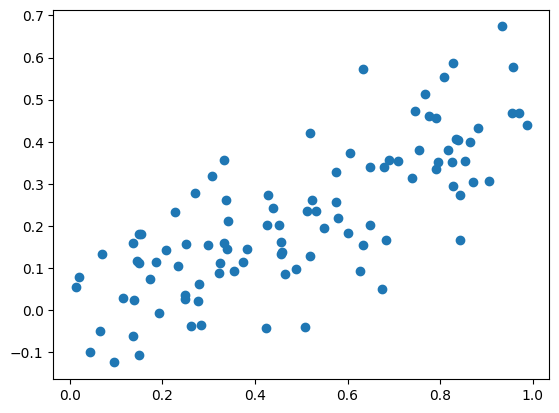

In [7]:
# Scatter plot between x1 and x2
plt.scatter(x1, x2)

In [8]:
np.corrcoef(x1, x2) # Correlation between x1 and x2

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

In [13]:
X = pd.DataFrame({
    'x1': x1,
    'x2': x2
})

design = ModelSpec(['x1', 'x2'])
X = design.fit_transform(X)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           5.76e-08
Time:                        18:48:36   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the results table:

* $\beta_0=1.9579$
* $\beta_1=1.6154$
* $\beta_2=0.9428$

$\beta_0$ is close to 2, $\beta_1$ is somewhat close to 2, but not so much, and $\beta_2$ is not close enough from 0.3.

Given the p-values from the table, and setting a threshold of 0.05, we can reject the null hypothesis for $\beta_1=0$, but not for $\beta_2=0$.

In [16]:
# Using only x1
X = pd.DataFrame({
    'x1': x1
})

design = ModelSpec(['x1'])
X = design.fit_transform(X)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           1.37e-08
Time:                        18:55:09   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Using only x2
X = pd.DataFrame({
    'x2': x2
})

design = ModelSpec(['x2'])
X = design.fit_transform(X)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           7.43e-07
Time:                        18:55:51   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""